In [2]:
import numpy

numpy.__version__

'1.26.4'

In [3]:
import inference

Matplotlib is building the font cache; this may take a moment.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


In [7]:
!export ROBOFLOW_API_KEY="WNJX84xQlZsMICKGFtRR"


In [8]:
!echo $ROBOFLOW_API_KEY

In [10]:
model = inference.get_model("robot-detection-xru6m/4", api_key="WNJX84xQlZsMICKGFtRR")

In [15]:
from PIL import Image, ImageDraw


In [17]:
results = model.infer(image="/Users/shravanprasanth/Documents/AIScouter/src/main/test.png", confidence=0.5).json()

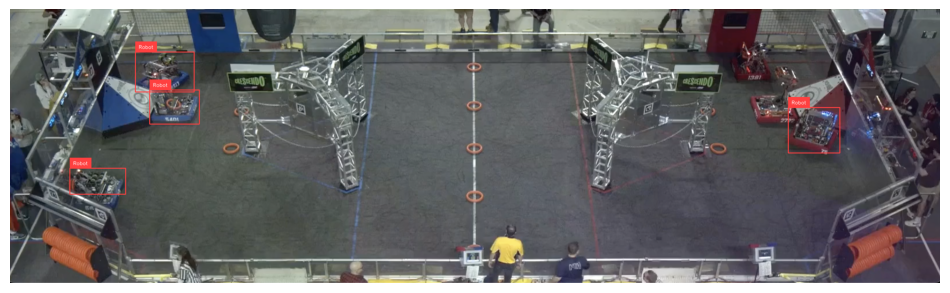

In [47]:
from io import BytesIO
import cv2
import requests
import supervision as sv
from inference import get_model
from PIL import Image
from PIL.ImageFile import ImageFile



# load the image from an url
image = Image.open("/Users/shravanprasanth/Documents/AIScouter/src/main/test.png")

# load a pre-trained yolov8n model
model = get_model("robot-detection-xru6m/4", api_key="WNJX84xQlZsMICKGFtRR")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)

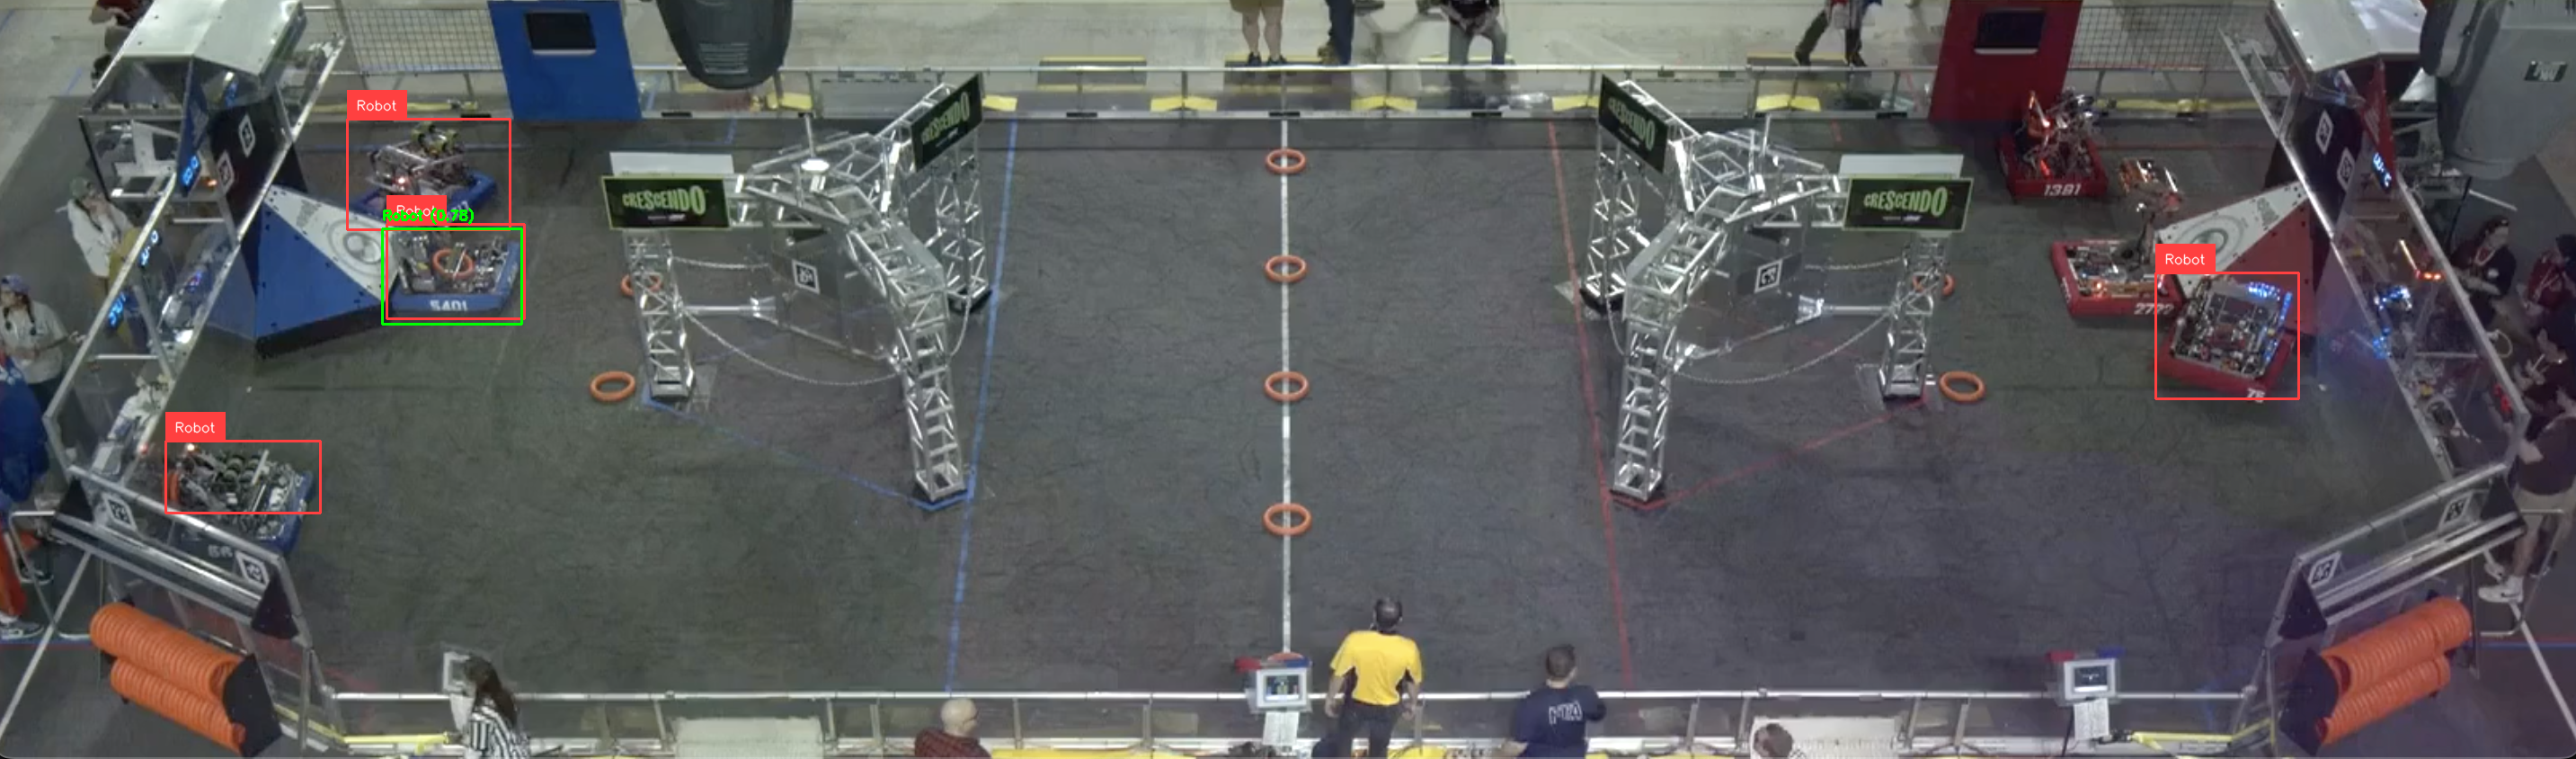

In [46]:
results = model.infer(image, overlap=0.9)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

image_cv2 = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)

# Create Supervision annotators
bounding_box_annotator = sv.BoxAnnotator()

# Annotate the image with bounding boxes
annotated_image = bounding_box_annotator.annotate(scene=image_cv2, detections=detections)

# Extract the data from detections
bboxes = detections.xyxy
confidences = detections.confidence
class_names = detections.data['class_name']

# Draw labels manually using OpenCV
for bbox, confidence, class_name in zip(bboxes, confidences, class_names):
    bbox = bbox.astype(int)  # Convert to integer coordinates
    x0, y0, x1, y1 = bbox
    label = f"{class_name} ({confidence:.2f})"
    
    # Draw the bounding box
    cv2.rectangle(annotated_image, (x0, y0), (x1, y1), color=(0, 255, 0), thickness=2)
    
    # Draw the label
    cv2.putText(annotated_image, label, (x0, y0 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert back to PIL for saving
annotated_image_pil = Image.fromarray(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))

# Display the annotated image
annotated_image_pil

In [48]:
from roboflow import Roboflow
rf = Roboflow(api_key="WNJX84xQlZsMICKGFtRR")
project = rf.workspace("main-wcgiu").project("robot-detection-xru6m")
version = project.version(5)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.77, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Robot-Detection-5 in yolov8:: 100%|██████████| 3140/3140 [00:01<00:00, 1692.82it/s]


In [51]:
from ultralytics import YOLO

model = YOLO('/Users/shravanprasanth/Documents/AIScouter/src/yolov8n.pt')

results = model.train(data='/Users/shravanprasanth/Documents/AIScouter/src/main/Robot-Detection-5/data.yaml', epochs=100, imgsz=640)

Ultralytics YOLOv8.2.77 🚀 Python-3.9.6 torch-2.2.2 CPU (Intel Core(TM) i5-8279U 2.40GHz)
engine/trainer: task=detect, mode=train, model=/Users/shravanprasanth/Documents/AIScouter/src/yolov8n.pt, data=/Users/shravanprasanth/Documents/AIScouter/src/main/Robot-Detection-5/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save

train: Scanning /Users/shravanprasanth/Documents/AIScouter/src/main/Robot-Detection-5/train/labels... 1524 images, 78 backgrounds, 0 corrupt: 100%|██████████| 1524/1524 [00:01<00:00, 1329.80it/s]

train: WARNING ⚠️ /Users/shravanprasanth/Documents/AIScouter/src/main/Robot-Detection-5/train/images/QM58-FMA-DCMP-match-time_mp4-0038_jpg.rf.8223d6740e6d509861ad10fe3dcc7047.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /Users/shravanprasanth/Documents/AIScouter/src/main/Robot-Detection-5/train/images/QM58-FMA-DCMP-match-time_mp4-0038_jpg.rf.ceec0f6bb1ddda29e9fad4e0735c4755.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /Users/shravanprasanth/Documents/AIScouter/src/main/Robot-Detection-5/train/images/QM58-FMA-DCMP-match-time_mp4-0038_jpg.rf.e41c7fea671817295714e7992c4c5d86.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /Users/shravanprasanth/Documents/AIScouter/src/main/Robot-Detection-5/train/images/QM58-FMA-DCMP-match-time_mp4-0039_jpg.rf.65cf06b719c5f1e0584ade09ecae1b25.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /Users/shravanprasanth/Documents/AIScouter/src/main/Robot-Detection-5/train/images/QM58-FMA-DCMP-match-time_mp4-0039_jpg.rf.b7cd25151fd2c0a2b0d16951d57bf2

train: New cache created: /Users/shravanprasanth/Documents/AIScouter/src/main/Robot-Detection-5/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 54, len(boxes) = 8553. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning /Users/shravanprasanth/Documents/AIScouter/src/main/Robot-Detection-5/valid/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 748.23it/s]

val: New cache created: /Users/shravanprasanth/Documents/AIScouter/src/main/Robot-Detection-5/valid/labels.cache


Plotting labels to /Users/shravanprasanth/Documents/AIScouter/runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/shravanprasanth/Documents/AIScouter/runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.859      1.937      1.329         25        640: 100%|██████████| 96/96 [13:12<00:00,  8.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.67s/it]

                   all         25        139      0.969      0.673      0.885      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.716      1.242      1.272        108        640:  17%|█▋        | 16/96 [02:20<11:43,  8.80s/it]


KeyboardInterrupt: 

In [ ]:
/Users/shravanprasanth/Documents/AIScouter/src/main/Robot-Detection-5/Robot-Detection-5/data.yaml